In [ ]:
# 한글 폰트 깨지는것을 막아줌 (mac)
from matplotlib import font_manager, rc
font_path = '/Users/ijung-yun/Library/Fonts/뫼비우스 Bold.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
# 한글 폰트 깨지는것을 막아줌 (windows)
from matplotlib import font_manager, rc
font_path = '/Windows/Fonts/H2GTRM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## 데이터 로드

In [66]:
# 최종 가공한 데이터셋 로드(git hub 기준)
df = pd.read_csv('dataset/법정동과 편의시설_1020.csv', index_col=0)
df

,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,세탁업,영화상영관,제과점영업,체력단련장업,...,119안전센터,공원수,노래방수,당구장,도서관,박물관미술관,우체국,음식점수,카페수,패스트푸드
0,청운동,0,7,2,0,0,0,0,0,0,...,0,0,0,0,1.0,0.0,0.0,16.0,8.0,0.0
1,신교동,0,0,0,0,0,2,0,1,0,...,1,0,0,1,0.0,0.0,0.0,10.0,1.0,0.0
2,궁정동,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,4.0,1.0,0.0
3,효자동,0,2,1,0,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,16.0,5.0,0.0
4,창성동,0,2,2,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,23.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,3,37,1,6,2,9,0,8,8,...,0,1,15,5,1.0,0.0,0.0,187.0,34.0,3.0
461,암사동,1,29,3,8,3,23,0,22,16,...,1,1,29,12,1.0,0.0,0.0,411.0,69.0,9.0
462,성내동,1,54,3,14,4,35,19,34,30,...,1,0,60,25,1.0,0.0,0.0,982.0,142.0,20.0
463,천호동,3,51,3,7,3,47,6,37,14,...,1,0,44,22,2.0,0.0,0.0,1001.0,136.0,28.0


In [ ]:
# 최종 가공한 데이터셋 로드 (정윤님)
df = pd.read_csv('../Dataset/법정동과 편의시설_1020.csv')
df.head()

### df_3

In [5]:
df_3 = df.copy()

In [6]:
# 연관 컬럼 묶어주기 (default)
df_3['의료'] = df['병원'] + df['의원'] + df['약국']
df_3['생활복지시설'] = df['치안센터'] + df['경찰서'] + df['119안전센터'] + df['우체국'] + df['도서관']
df_3['생활편의시설'] = df['목욕장업'] + df['세탁업']
df_3['여가'] = df['골프연습장업'] + df['체력단련장업'] + df['당구장'] + df['노래방수'] + df['영화상영관'] + df['공원수'] + df['박물관미술관'] 
df_3['교통'] = df['지하철역'] + df['버스정류소']
df_3['쇼핑시설'] = df['백화점'] + df['복합쇼핑몰'] + df['쇼핑센터'] + df['서점'] 
df_3['장보기시설'] = df['대규모점포'] + df['구분없음'] + df['대형마트'] + df['시장']  + df['제과점영업']
df_3

,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,세탁업,영화상영관,제과점영업,체력단련장업,...,음식점수,카페수,패스트푸드,의료,생활복지시설,생활편의시설,여가,교통,쇼핑시설,장보기시설
0,청운동,0,7,2,0,0,0,0,0,0,...,16.0,8.0,0.0,0,1.0,0,0.0,7,2,0
1,신교동,0,0,0,0,0,2,0,1,0,...,10.0,1.0,0.0,1,1.0,2,1.0,0,0,1
2,궁정동,0,1,0,0,0,0,0,0,0,...,4.0,1.0,0.0,0,1.0,0,0.0,1,0,0
3,효자동,0,2,1,0,0,0,0,1,0,...,16.0,5.0,0.0,0,0.0,0,0.0,2,1,1
4,창성동,0,2,2,0,0,0,0,0,0,...,23.0,3.0,0.0,4,0.0,0,0.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,3,37,1,6,2,9,0,8,8,...,187.0,34.0,3.0,34,3.0,11,35.0,40,1,8
461,암사동,1,29,3,8,3,23,0,22,16,...,411.0,69.0,9.0,92,4.0,26,66.0,30,3,23
462,성내동,1,54,3,14,4,35,19,34,30,...,982.0,142.0,20.0,170,4.0,39,148.0,55,3,37
463,천호동,3,51,3,7,3,47,6,37,14,...,1001.0,136.0,28.0,205,6.0,50,93.0,54,4,42


In [7]:
# 필요한 컬럼값만 추출
df_3 = df_3[['법정동명', '의료', '생활복지시설', '생활편의시설', '여가', '교통', '음식점수', '카페수', '패스트푸드', '쇼핑시설', '장보기시설']]
df_3

,법정동명,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
0,청운동,0,1.0,0,0.0,7,16.0,8.0,0.0,2,0
1,신교동,1,1.0,2,1.0,0,10.0,1.0,0.0,0,1
2,궁정동,0,1.0,0,0.0,1,4.0,1.0,0.0,0,0
3,효자동,0,0.0,0,0.0,2,16.0,5.0,0.0,1,1
4,창성동,4,0.0,0,0.0,2,23.0,3.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,34,3.0,11,35.0,40,187.0,34.0,3.0,1,8
461,암사동,92,4.0,26,66.0,30,411.0,69.0,9.0,3,23
462,성내동,170,4.0,39,148.0,55,982.0,142.0,20.0,3,37
463,천호동,205,6.0,50,93.0,54,1001.0,136.0,28.0,4,42


In [8]:
# 분포
df_3.describe()

,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,42.230108,1.907527,10.045161,31.486022,24.533333,262.501075,33.696774,4.159140,1.503226,9.724731
std,84.166225,2.617507,17.157740,54.878945,36.636369,409.604599,53.327474,7.369588,2.705456,15.199022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,3.000000,3.000000,35.000000,5.000000,0.000000,0.000000,1.000000
50%,11.000000,1.000000,3.000000,7.000000,8.000000,100.000000,13.000000,1.000000,0.000000,3.000000
75%,46.000000,3.000000,13.000000,34.000000,34.000000,312.000000,38.000000,5.000000,2.000000,12.000000
max,805.000000,16.000000,138.000000,365.000000,274.000000,3057.000000,375.000000,63.000000,20.000000,93.000000


## 데이터 전처리

### df_3_x

In [9]:
df_3_x = df_3.copy()

In [10]:
df_3_x.loc[(df_3_x['의료'] == 2), '의료'] = 1
df_3_x.loc[(df_3_x['의료'] >= 3) & (df_3_x['의료'] <= 5), '의료'] = 2
df_3_x.loc[(df_3_x['의료'] >= 6) & (df_3_x['의료'] <= 10), '의료'] = 3
df_3_x.loc[(df_3_x['의료'] >= 11) & (df_3_x['의료'] <= 20), '의료'] = 4
df_3_x.loc[(df_3_x['의료'] >= 21) & (df_3_x['의료'] <= 46), '의료'] = 5
df_3_x.loc[(df_3_x['의료'] >= 47) & (df_3_x['의료'] <= 99), '의료'] = 6
df_3_x.loc[(df_3_x['의료'] >= 100), '의료'] = 7

df_3_x.loc[(df_3_x['생활복지시설'] == 2), '생활복지시설'] = 1
df_3_x.loc[(df_3_x['생활복지시설'] >= 3), '생활복지시설'] = 2

df_3_x.loc[(df_3_x['생활편의시설'] == 2), '생활편의시설'] = 1
df_3_x.loc[(df_3_x['생활편의시설'] >= 3) & (df_3_x['생활편의시설'] <= 10), '생활편의시설'] = 2
df_3_x.loc[(df_3_x['생활편의시설'] >= 11), '생활편의시설'] = 3

df_3_x.loc[(df_3_x['여가'] == 2), '여가'] = 1
df_3_x.loc[(df_3_x['여가'] >= 3) & (df_3_x['여가'] <= 5), '여가'] = 2
df_3_x.loc[(df_3_x['여가'] >= 6) & (df_3_x['여가'] <= 11), '여가'] = 3
df_3_x.loc[(df_3_x['여가'] >= 12) & (df_3_x['여가'] <= 34), '여가'] = 4
df_3_x.loc[(df_3_x['여가'] >= 35) & (df_3_x['여가'] <= 117), '여가'] = 5
df_3_x.loc[(df_3_x['여가'] >= 118), '여가'] = 6

df_3_x.loc[(df_3_x['교통'] == 5), '교통'] = 4
df_3_x.loc[(df_3_x['교통'] >= 6) & (df_3_x['교통'] <= 7), '교통'] = 5
df_3_x.loc[(df_3_x['교통'] >= 8) & (df_3_x['교통'] <= 12), '교통'] = 6
df_3_x.loc[(df_3_x['교통'] >= 13) & (df_3_x['교통'] <= 20), '교통'] = 7
df_3_x.loc[(df_3_x['교통'] >= 21) & (df_3_x['교통'] <= 31), '교통'] = 8
df_3_x.loc[(df_3_x['교통'] >= 32) & (df_3_x['교통'] <= 46), '교통'] = 9
df_3_x.loc[(df_3_x['교통'] >= 47) & (df_3_x['교통'] <= 72), '교통'] = 10
df_3_x.loc[(df_3_x['교통'] >= 73), '교통'] = 11

df_3_x.loc[(df_3_x['음식점수'] >= 0) & (df_3_x['음식점수'] <= 13), '음식점수'] = 0
df_3_x.loc[(df_3_x['음식점수'] >= 14) & (df_3_x['음식점수'] <= 25), '음식점수'] = 1
df_3_x.loc[(df_3_x['음식점수'] >= 26) & (df_3_x['음식점수'] <= 41), '음식점수'] = 2
df_3_x.loc[(df_3_x['음식점수'] >= 42) & (df_3_x['음식점수'] <= 60), '음식점수'] = 3
df_3_x.loc[(df_3_x['음식점수'] >= 61) & (df_3_x['음식점수'] <= 86), '음식점수'] = 4
df_3_x.loc[(df_3_x['음식점수'] >= 87) & (df_3_x['음식점수'] <= 117), '음식점수'] = 5
df_3_x.loc[(df_3_x['음식점수'] >= 118) & (df_3_x['음식점수'] <= 175), '음식점수'] = 6
df_3_x.loc[(df_3_x['음식점수'] >= 176) & (df_3_x['음식점수'] <= 286), '음식점수'] = 7
df_3_x.loc[(df_3_x['음식점수'] >= 287) & (df_3_x['음식점수'] <= 445), '음식점수'] = 8
df_3_x.loc[(df_3_x['음식점수'] >= 446) & (df_3_x['음식점수'] <= 920), '음식점수'] = 9
df_3_x.loc[(df_3_x['음식점수'] >= 921), '음식점수'] = 10

df_3_x.loc[(df_3_x['카페수'] >= 0) & (df_3_x['카페수'] <= 2), '카페수'] = 0
df_3_x.loc[(df_3_x['카페수'] >= 3) & (df_3_x['카페수'] <= 4), '카페수'] = 1
df_3_x.loc[(df_3_x['카페수'] >= 5) & (df_3_x['카페수'] <= 7), '카페수'] = 2
df_3_x.loc[(df_3_x['카페수'] >= 8) & (df_3_x['카페수'] <= 10), '카페수'] = 3
df_3_x.loc[(df_3_x['카페수'] >= 11) & (df_3_x['카페수'] <= 15), '카페수'] = 4
df_3_x.loc[(df_3_x['카페수'] >= 16) & (df_3_x['카페수'] <= 26), '카페수'] = 5
df_3_x.loc[(df_3_x['카페수'] >= 27) & (df_3_x['카페수'] <= 42), '카페수'] = 6
df_3_x.loc[(df_3_x['카페수'] >= 43) & (df_3_x['카페수'] <= 85), '카페수'] = 7
df_3_x.loc[(df_3_x['카페수'] >= 86), '카페수'] = 8

df_3_x.loc[(df_3_x['패스트푸드'] >= 2) & (df_3_x['패스트푸드'] <= 4), '패스트푸드'] = 1
df_3_x.loc[(df_3_x['패스트푸드'] >= 5), '패스트푸드'] = 2

df_3_x.loc[(df_3_x['쇼핑시설'] >= 2), '쇼핑시설'] = 1

df_3_x.loc[(df_3_x['장보기시설'] == 2), '장보기시설'] = 1
df_3_x.loc[(df_3_x['장보기시설'] >= 3) & (df_3_x['장보기시설'] <= 7), '장보기시설'] = 2
df_3_x.loc[(df_3_x['장보기시설'] >= 8) & (df_3_x['장보기시설'] <= 22), '장보기시설'] = 3
df_3_x.loc[(df_3_x['장보기시설'] >= 23), '장보기시설'] = 4

df_3_x

,법정동명,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
0,청운동,0,1.0,0,0.0,5,1.0,3.0,0.0,1,0
1,신교동,1,1.0,1,1.0,0,0.0,0.0,0.0,0,1
2,궁정동,0,1.0,0,0.0,1,0.0,0.0,0.0,0,0
3,효자동,0,0.0,0,0.0,2,1.0,2.0,0.0,1,1
4,창성동,2,0.0,0,0.0,2,1.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,5,2.0,3,5.0,9,7.0,6.0,1.0,1,3
461,암사동,6,2.0,3,5.0,8,8.0,7.0,2.0,1,4
462,성내동,7,2.0,3,6.0,10,10.0,8.0,2.0,1,4
463,천호동,7,2.0,3,5.0,10,10.0,8.0,2.0,1,4


In [11]:
# df_3_x 분포
df_3_x.describe()

,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,3.488172,0.881720,1.561290,2.933333,5.574194,4.931183,4.017204,0.894624,0.486022,1.825806
std,2.291375,0.788515,1.131926,1.800942,3.478286,3.128635,2.565463,0.793069,0.500343,1.346203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000
50%,4.000000,1.000000,2.000000,3.000000,6.000000,5.000000,4.000000,1.000000,0.000000,2.000000
75%,5.000000,2.000000,3.000000,4.000000,9.000000,8.000000,6.000000,2.000000,1.000000,3.000000
max,7.000000,2.000000,3.000000,6.000000,11.000000,10.000000,8.000000,2.000000,1.000000,4.000000


In [12]:
# df_3_x.to_csv('junghun.csv')

In [13]:
df_3_x = df_3_x.drop(['법정동명'], axis=1)
df_3_x

,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
0,0,1.0,0,0.0,5,1.0,3.0,0.0,1,0
1,1,1.0,1,1.0,0,0.0,0.0,0.0,0,1
2,0,1.0,0,0.0,1,0.0,0.0,0.0,0,0
3,0,0.0,0,0.0,2,1.0,2.0,0.0,1,1
4,2,0.0,0,0.0,2,1.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
460,5,2.0,3,5.0,9,7.0,6.0,1.0,1,3
461,6,2.0,3,5.0,8,8.0,7.0,2.0,1,4
462,7,2.0,3,6.0,10,10.0,8.0,2.0,1,4
463,7,2.0,3,5.0,10,10.0,8.0,2.0,1,4


In [14]:
df_3_x.describe()

,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,3.488172,0.881720,1.561290,2.933333,5.574194,4.931183,4.017204,0.894624,0.486022,1.825806
std,2.291375,0.788515,1.131926,1.800942,3.478286,3.128635,2.565463,0.793069,0.500343,1.346203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000
50%,4.000000,1.000000,2.000000,3.000000,6.000000,5.000000,4.000000,1.000000,0.000000,2.000000
75%,5.000000,2.000000,3.000000,4.000000,9.000000,8.000000,6.000000,2.000000,1.000000,3.000000
max,7.000000,2.000000,3.000000,6.000000,11.000000,10.000000,8.000000,2.000000,1.000000,4.000000


In [15]:
corr_3_x = df_3_x.corr()

<AxesSubplot: >

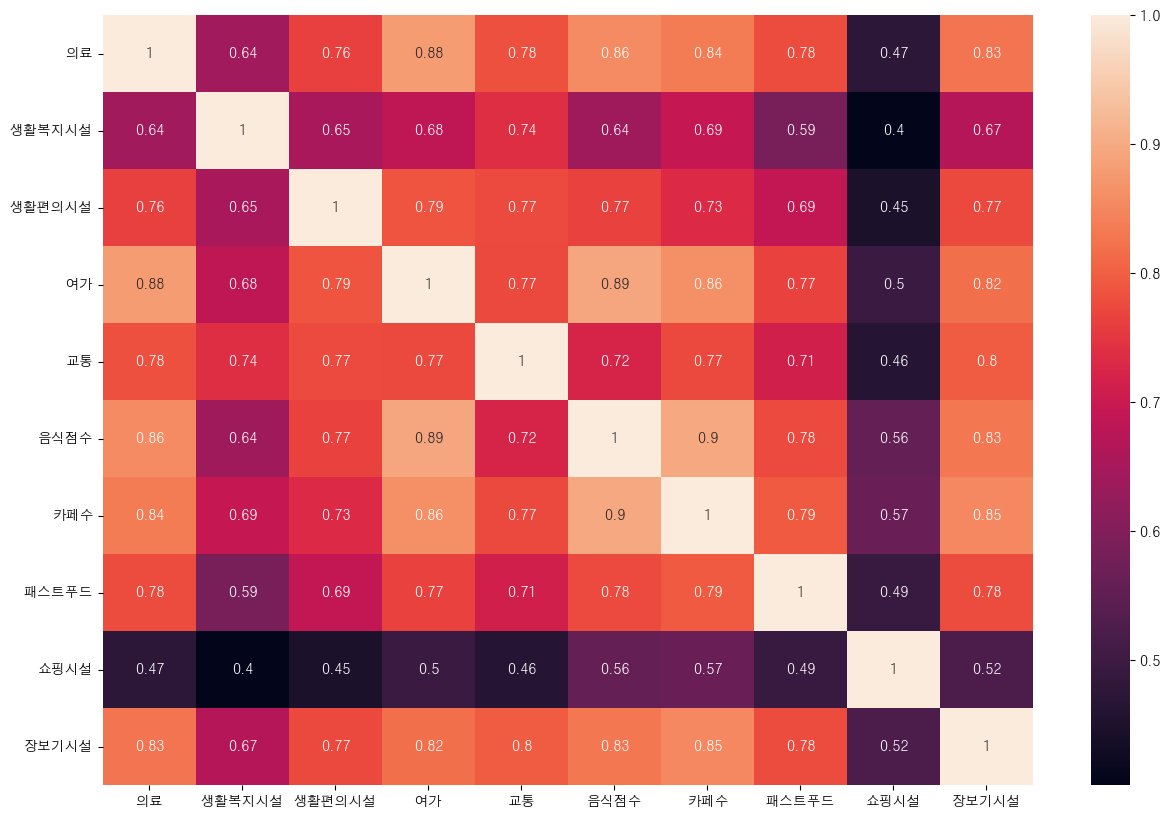

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_3_x, annot=True)

### df_3_x 스케일링

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled_3_x = StandardScaler().fit_transform(df_3_x)

In [18]:
pd.DataFrame(data_scaled_3_x).describe().round(2)

,0,1,2,3,4,5,6,7,8,9
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.52,-1.12,-1.38,-1.63,-1.60,-1.58,-1.57,-1.13,-0.97,-1.36
25%,-1.09,-1.12,-0.50,-0.52,-0.74,-0.94,-0.79,-1.13,-0.97,-0.61
50%,0.22,0.15,0.39,0.04,0.12,0.02,-0.01,0.13,-0.97,0.13
75%,0.66,1.42,1.27,0.59,0.99,0.98,0.77,1.40,1.03,0.87
max,1.53,1.42,1.27,1.70,1.56,1.62,1.55,1.40,1.03,1.62


### df_3_x 차원축소

In [20]:
from sklearn.decomposition import PCA

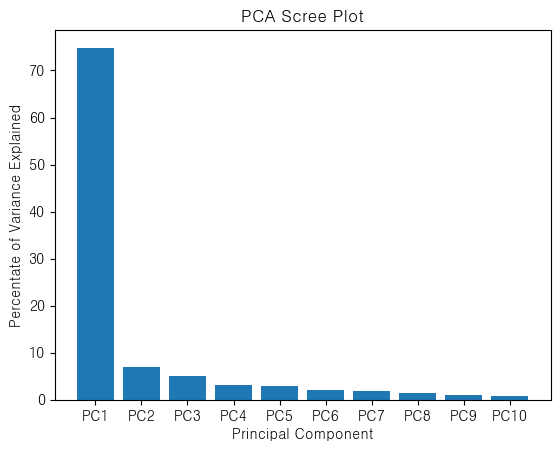

0    0.748405
1    0.817596
2    0.867214
3    0.898679
4    0.927309
5    0.948921
6    0.967473
7    0.981695
8    0.991927
9    1.000000
dtype: float64

In [21]:
# PCA 주성분분석
pca_test = PCA(random_state=1107)
X_p = pca_test.fit_transform(data_scaled_3_x)


percent_variance = np.round(pca_test.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
pd.Series(np.cumsum(pca_test.explained_variance_ratio_))

In [22]:
pca_3_x = PCA(n_components=6)
pc_3_x = pca_3_x.fit_transform(data_scaled_3_x)

In [23]:
pcd_3_x = pd.DataFrame(pc_3_x)
pcd_3_x

,0,1,2,3,4,5
0,-2.650329,1.388512,-1.706459,0.439017,-0.290767,0.348880
1,-3.200565,-0.543916,-0.781466,-0.025503,0.143560,-0.656578
2,-3.970756,-0.331001,-1.068677,0.577164,-0.159227,-0.403004
3,-3.170465,1.804309,-0.475967,-0.008497,-0.286641,0.406822
4,-3.259911,1.714754,-0.363999,-0.103764,-0.138691,0.335742
...,...,...,...,...,...,...
460,2.780194,0.110465,-0.984131,-0.391585,0.520587,-0.076631
461,3.720713,0.170902,-0.231157,0.153654,-0.169867,-0.413612
462,4.589772,0.034259,0.015264,0.221203,0.172985,-0.033450
463,4.400831,0.081036,-0.082161,0.198632,-0.021960,-0.012334


In [24]:
pcd_3_x.sort_values(1, ascending=False), pcd_3_x.sort_values(0, ascending=False)

(            0         1         2         3         4         5
 143 -3.021979  1.908561 -0.117421  0.065998  0.012770  0.201945
 135 -2.479153  1.886639  0.221816  0.561594 -0.884232 -0.173899
 21  -0.947274  1.857692  1.349255  1.089772  0.484932 -0.157491
 11  -2.015401  1.854593  0.449153  0.416301  0.807294  0.280540
 8   -3.777670  1.836140 -0.535082 -0.145807 -0.199605 -0.089735
 ..        ...       ...       ...       ...       ...       ...
 286  2.634637 -1.713957 -0.290237  0.099648 -0.696591 -0.430434
 235  3.319360 -1.743063  0.132797  0.310479 -0.150688 -0.375760
 225  2.590050 -1.762621 -0.281736 -0.117939  0.704335 -0.011677
 239  1.306677 -1.774061 -0.978932 -0.493787 -0.045281 -0.277034
 365  3.807073 -1.863491  0.206319  0.212376 -0.290695  0.139573
 
 [465 rows x 6 columns],
             0         1         2         3         4         5
 336  4.681940 -0.019510 -0.073042  0.149561  0.071459  0.129294
 297  4.681940 -0.019510 -0.073042  0.149561  0.071459  0.12929

### df_3_x 시각화

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


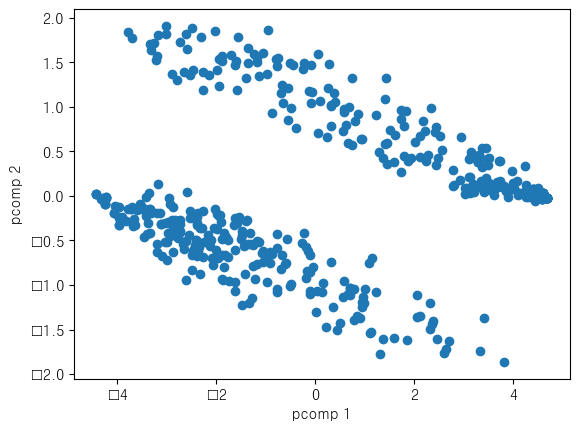

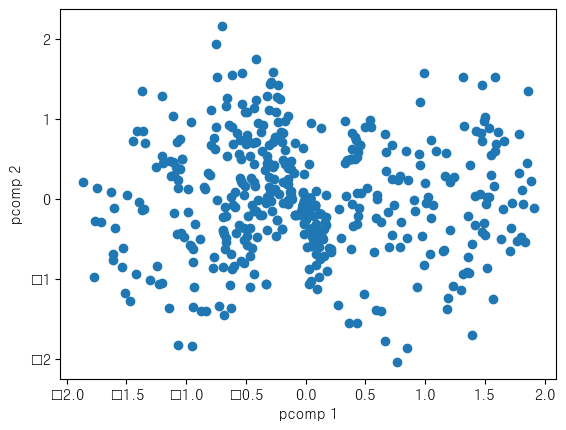

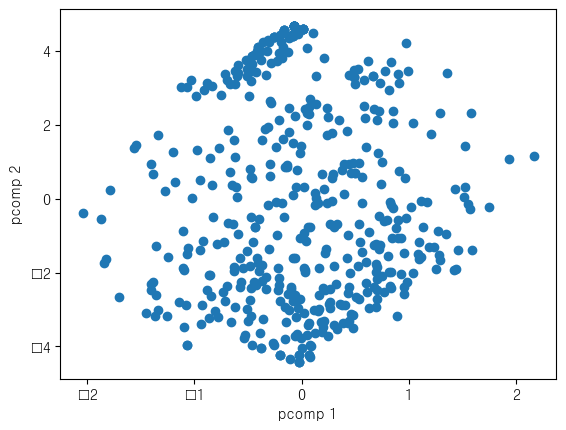

In [25]:
from turtle import shape


plt.figure()
plt.scatter(pcd_3_x[0],pcd_3_x[1],)
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[2],)
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

plt.figure()
plt.scatter(pcd_3_x[2],pcd_3_x[0],)
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

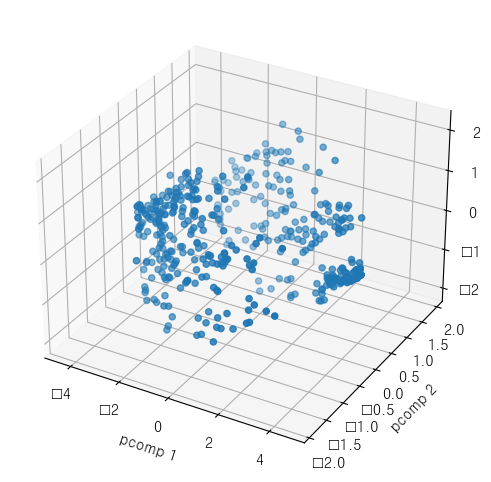

In [26]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_3_x[0],pcd_3_x[1],pcd_3_x[2])

### 군집 분석 검증을 위해 데이터 값을 인덱스해서 넣어봄

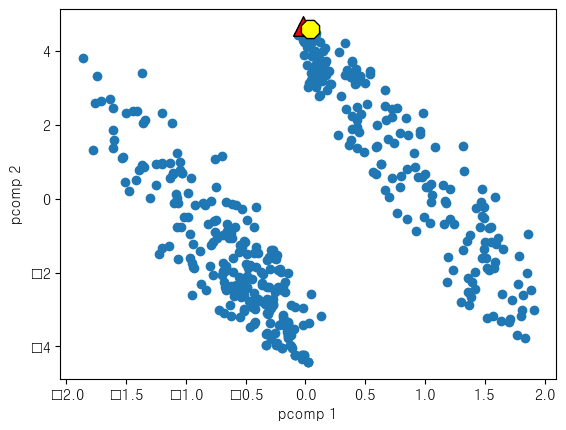

In [27]:
from turtle import shape


plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[0],)
plt.scatter(pcd_3_x[1][231],pcd_3_x[0][231], c='red', marker="^" , s=200, edgecolors="black")
plt.scatter(pcd_3_x[1][435],pcd_3_x[0][435], c='yellow', marker="8" , s=200, edgecolors="black")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

# 231, 435는 비슷한 두 데이터

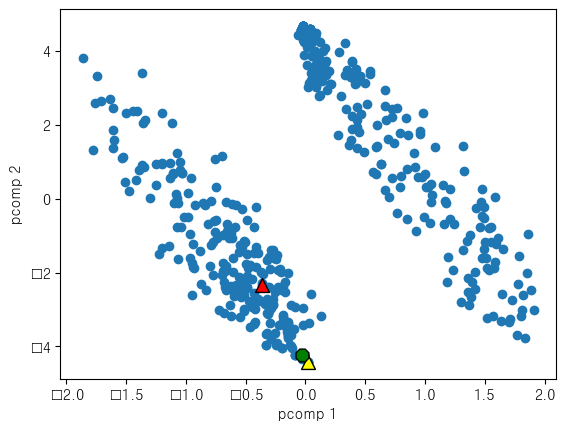

In [28]:
from turtle import shape


plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[0],)
plt.scatter(pcd_3_x[1][254],pcd_3_x[0][254], c='red', marker="^" , s=100, edgecolors="black")

plt.scatter(pcd_3_x[1][49],pcd_3_x[0][49], c='yellow', marker="^" , s=100, edgecolors="black")
plt.scatter(pcd_3_x[1][158],pcd_3_x[0][158], c='green', marker="8" , s=100, edgecolors="black")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

# 49, 158 비슷한 데이터 / 254 는 다른 분포의 데이터

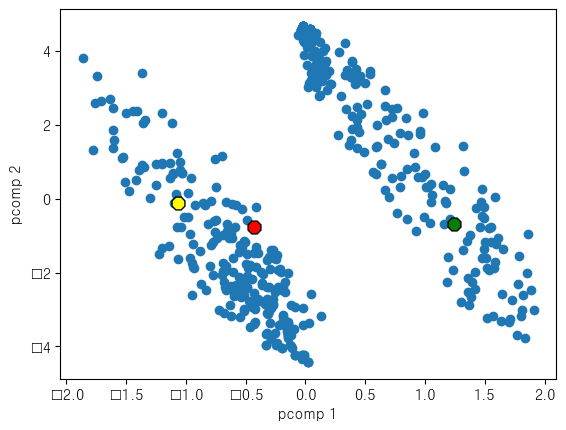

In [29]:
from turtle import shape


plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[0],)
plt.scatter(pcd_3_x[1][100],pcd_3_x[0][100], c='red', marker="8" , s=100, edgecolors="black")
plt.scatter(pcd_3_x[1][200],pcd_3_x[0][200], c='yellow', marker="8" , s=100, edgecolors="black")
plt.scatter(pcd_3_x[1][300],pcd_3_x[0][300], c='green', marker="8" , s=100, edgecolors="black")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

# 임의의 숫자를 넣어봄

## K-means

### df_3_x

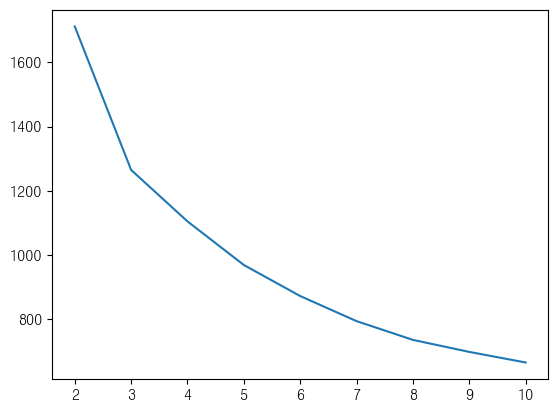

In [30]:
from sklearn.cluster import KMeans
def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        kmeans = KMeans(n_cluster)
        kmeans.fit_predict(X_features)
        inertias.append(kmeans.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], pc_3_x)

In [68]:
from sklearn.cluster import KMeans
km_3_x = KMeans(n_clusters=7, random_state=5)

# 엘보 포인트가 8인거같은데 시각적으로 7이 더 깔끔하게 군집 나뉘어보임

In [69]:
km_3_x.fit_transform(pc_3_x)
km_3_x.labels_

array([0, 6, 6, 0, 0, 3, 4, 0, 0, 6, 0, 3, 0, 4, 4, 6, 3, 4, 3, 4, 4, 3,
       3, 4, 6, 3, 0, 3, 4, 4, 6, 6, 6, 0, 2, 4, 4, 3, 6, 3, 4, 4, 6, 0,
       6, 4, 3, 3, 6, 6, 4, 6, 4, 0, 3, 4, 4, 0, 4, 6, 4, 4, 3, 3, 6, 2,
       0, 3, 5, 4, 3, 3, 4, 5, 1, 4, 4, 6, 6, 6, 6, 4, 5, 5, 3, 4, 4, 4,
       4, 3, 4, 2, 6, 6, 6, 6, 6, 3, 2, 4, 4, 0, 4, 6, 2, 6, 0, 3, 4, 6,
       3, 2, 4, 3, 6, 4, 6, 6, 4, 4, 0, 6, 6, 4, 3, 4, 6, 6, 6, 4, 2, 4,
       6, 4, 5, 0, 4, 4, 0, 0, 4, 3, 6, 0, 3, 4, 0, 3, 1, 4, 4, 2, 3, 4,
       3, 6, 6, 5, 6, 6, 4, 5, 5, 6, 5, 4, 6, 5, 2, 6, 5, 3, 2, 4, 6, 6,
       6, 6, 6, 4, 6, 4, 6, 6, 4, 5, 6, 4, 5, 2, 5, 1, 0, 6, 6, 0, 5, 4,
       5, 4, 2, 2, 4, 1, 4, 2, 5, 5, 5, 5, 1, 1, 4, 2, 1, 2, 1, 5, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 5, 2, 1, 1, 1, 1, 1, 1, 1, 5, 4, 2, 3, 4,
       6, 0, 4, 4, 6, 4, 4, 6, 4, 4, 3, 3, 4, 3, 6, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 5, 5, 1, 1, 5, 1, 1, 1, 1, 2, 1, 3,

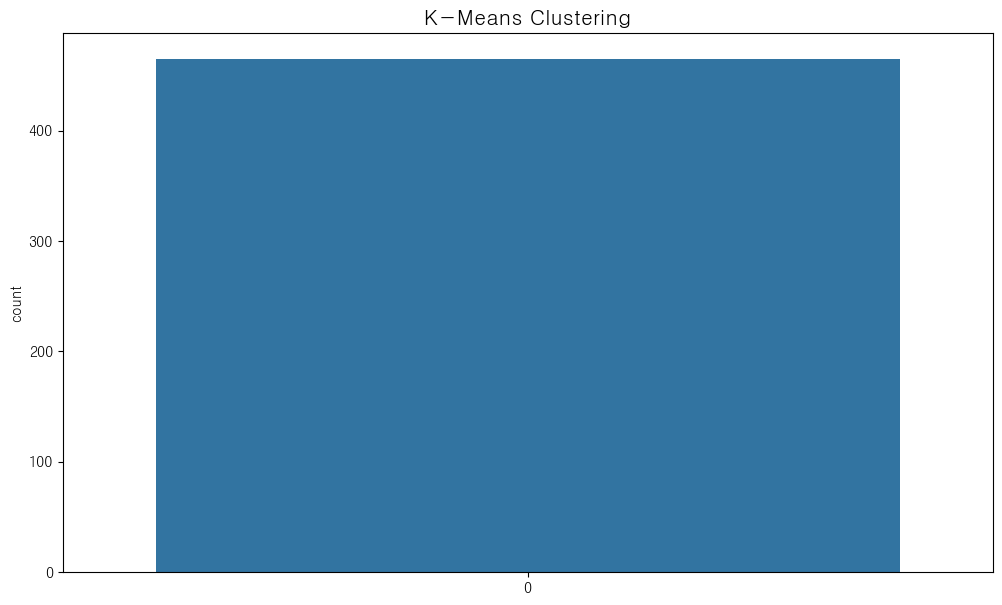

In [70]:
plt.figure(figsize=(12, 7))
sns.countplot(km_3_x.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.show()

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_3_x = silhouette_score(pc_3_x, km_3_x.labels_)
score_3_x

0.31522003492257494

In [72]:
pcd_3_x = pd.DataFrame(pc_3_x)
pcd_3_x['cluster_id'] = km_3_x.labels_
pcd_3_x

,0,1,2,3,4,5,cluster_id
0,-2.650329,1.388512,-1.706459,0.439017,-0.290767,0.348880,0
1,-3.200565,-0.543916,-0.781466,-0.025503,0.143560,-0.656578,6
2,-3.970756,-0.331001,-1.068677,0.577164,-0.159227,-0.403004,6
3,-3.170465,1.804309,-0.475967,-0.008497,-0.286641,0.406822,0
4,-3.259911,1.714754,-0.363999,-0.103764,-0.138691,0.335742,0
...,...,...,...,...,...,...,...
460,2.780194,0.110465,-0.984131,-0.391585,0.520587,-0.076631,1
461,3.720713,0.170902,-0.231157,0.153654,-0.169867,-0.413612,1
462,4.589772,0.034259,0.015264,0.221203,0.172985,-0.033450,1
463,4.400831,0.081036,-0.082161,0.198632,-0.021960,-0.012334,1


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


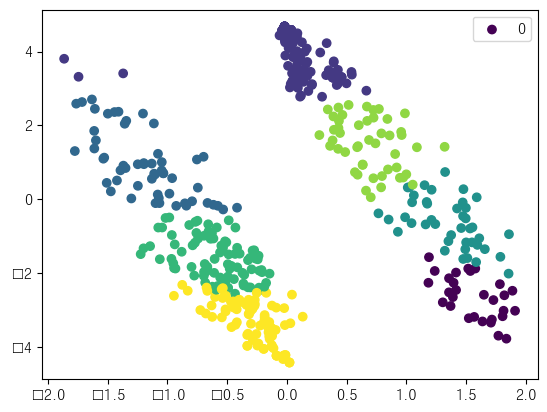

In [73]:
plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[0], c=pcd_3_x['cluster_id'])
plt.legend((pcd_3_x['cluster_id']))
plt.show()

<Figure size 640x480 with 0 Axes>

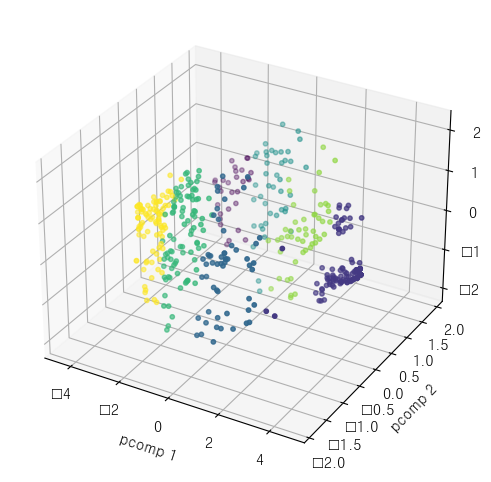

In [79]:
from turtle import color


plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_3_x[0],pcd_3_x[1],pcd_3_x[2], c=pcd_3_x['cluster_id'] , s=10)

## GMM : Gaussian_

### df_3_x

In [80]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components= 7, max_iter=100 ,random_state=0)
gmm.fit(pc_3_x)
gmm_cluster_labels = gmm.predict(pc_3_x)
gmm_cluster_labels

array([6, 4, 4, 6, 6, 5, 3, 6, 6, 3, 5, 5, 6, 3, 2, 3, 5, 3, 5, 2, 4, 5,
       5, 2, 3, 5, 5, 5, 2, 2, 4, 4, 3, 6, 2, 3, 4, 5, 3, 5, 4, 4, 4, 6,
       3, 2, 5, 5, 4, 3, 2, 3, 3, 6, 5, 3, 3, 6, 3, 3, 3, 3, 5, 5, 3, 0,
       6, 5, 5, 4, 5, 5, 2, 5, 1, 3, 4, 3, 3, 4, 3, 2, 5, 5, 5, 4, 3, 3,
       2, 5, 2, 3, 3, 3, 3, 3, 3, 5, 4, 3, 3, 6, 2, 3, 2, 3, 6, 5, 4, 3,
       5, 3, 3, 5, 4, 3, 3, 3, 4, 3, 6, 3, 4, 4, 5, 2, 3, 3, 3, 4, 4, 3,
       3, 3, 5, 6, 3, 4, 5, 6, 3, 5, 3, 6, 5, 3, 6, 5, 1, 3, 4, 3, 5, 4,
       5, 3, 4, 5, 3, 3, 2, 5, 5, 3, 5, 3, 4, 5, 2, 3, 5, 5, 2, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 4, 5, 3, 4, 5, 4, 5, 1, 6, 4, 3, 6, 1, 4,
       1, 4, 4, 0, 2, 1, 4, 0, 5, 5, 5, 5, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1,
       2, 2, 0, 0, 1, 0, 1, 0, 5, 0, 1, 1, 1, 1, 1, 0, 1, 5, 4, 0, 5, 3,
       3, 6, 3, 3, 3, 3, 3, 4, 4, 3, 5, 5, 2, 5, 3, 3, 3, 3, 3, 5, 3, 3,
       4, 3, 3, 3, 4, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5,

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


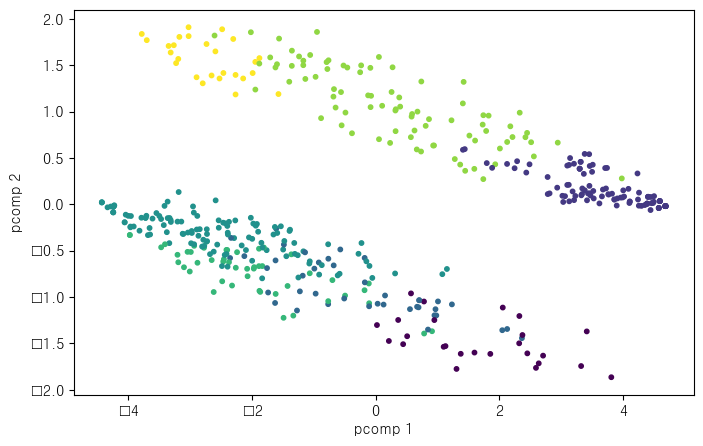

In [81]:
fig = plt.figure(figsize=(8,5))
plt.scatter(pc_3_x[:,0],pc_3_x[:,1] , c=gmm_cluster_labels , s=10)
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')

plt.show()

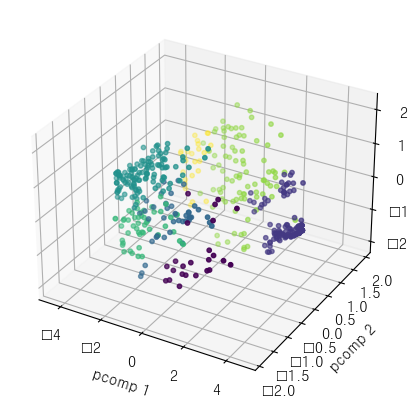

In [82]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_3_x[:,0],pc_3_x[:,1],pc_3_x[:,2] , c=gmm_cluster_labels , s=10)
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
plt.show()

In [83]:
score = silhouette_score(pc_3_x, gmm_cluster_labels)
score

0.23069681790757862

In [ ]:
# 실루엣 스코어 값이 잘 나오지 않지만, 군집화는 잘 된걸로 보인다.

## DBSCAN

### df_3_x

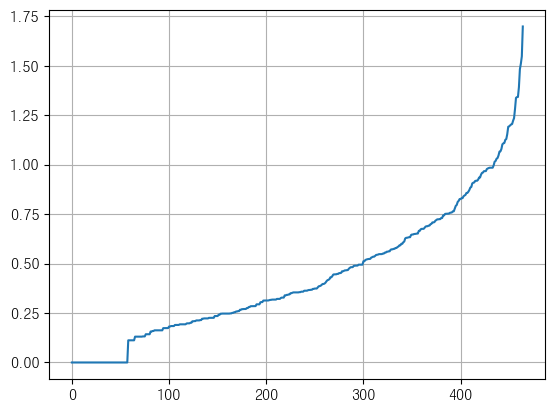

In [84]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(pc_3_x)
distances, indices = neighbors_fit.kneighbors(pc_3_x)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()

학습하기

In [85]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [86]:
# dbscan = DBSCAN(eps=0.7, min_samples=6) 이게 최선으로 보임
# dbscan = DBSCAN(eps=0.7, min_samples=5) 는 예외되는 값이 더 적어보임
dbscan = DBSCAN(eps=1.2, min_samples=5)

# DBSCAN은 fit_predict()가 학습이다.
dbscan_data = dbscan.fit_predict(pc_3_x)

dbscan_data
db_pred = pd.DataFrame(dbscan_data, columns=['dbscan2_label'])
display(db_pred.value_counts(), silhouette_score(pc_3_x, dbscan_data))

dbscan2_label
 0               205
 2               169
-1                35
 1                24
 5                12
 6                 8
 3                 7
 4                 5
dtype: int64

0.0479290348538372

In [87]:
pcd_3_x['cluster_id'] = db_pred
pcd_3_x

,0,1,2,3,4,5,cluster_id
0,-2.650329,1.388512,-1.706459,0.439017,-0.290767,0.348880,-1
1,-3.200565,-0.543916,-0.781466,-0.025503,0.143560,-0.656578,0
2,-3.970756,-0.331001,-1.068677,0.577164,-0.159227,-0.403004,0
3,-3.170465,1.804309,-0.475967,-0.008497,-0.286641,0.406822,1
4,-3.259911,1.714754,-0.363999,-0.103764,-0.138691,0.335742,1
...,...,...,...,...,...,...,...
460,2.780194,0.110465,-0.984131,-0.391585,0.520587,-0.076631,2
461,3.720713,0.170902,-0.231157,0.153654,-0.169867,-0.413612,2
462,4.589772,0.034259,0.015264,0.221203,0.172985,-0.033450,2
463,4.400831,0.081036,-0.082161,0.198632,-0.021960,-0.012334,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


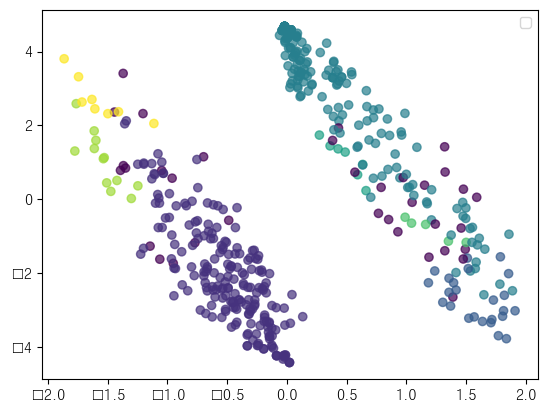

In [88]:
plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[0], c=pcd_3_x['cluster_id'], alpha=0.7)
plt.legend()
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

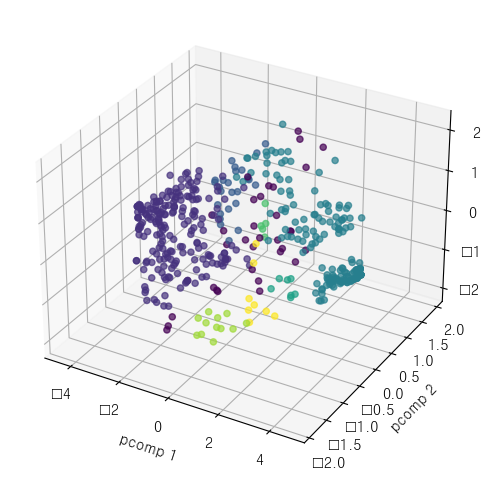

In [89]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_3_x[0],pcd_3_x[1],pcd_3_x[2], c=pcd_3_x['cluster_id'], alpha=0.7)

## 학습시키기(KNN)

### df_3_x

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcd_3_x.drop('cluster_id',axis=1), pcd_3_x.drop([0,1,2],axis=1), random_state=30)
X_train.shape, X_test.shape

In [ ]:
np.array(y_train).reshape(1, -1).round(2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

In [ ]:
(pred == np.array(y_test).reshape(1, -1)).mean()

In [ ]:
knn.score(X_test, y_test)

### df_2_x

In [80]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(pcd_2_x.drop('cluster_id',axis=1), pcd_2_x.drop([0,1,2],axis=1), random_state=30)
# X_train.shape, X_test.shape

((348, 3), (117, 3))

In [81]:
# np.array(y_train).reshape(1, -1).round(2)

array([[ 1,  1,  1,  1,  0,  2,  1,  0,  1,  1,  3,  2,  3,  1,  1,  1,
         2,  1,  0,  1,  1,  0,  1,  1,  1,  1,  2,  3,  1,  1,  2,  1,
         1,  1,  1,  2,  0,  0,  3,  0,  1,  1,  1,  3,  1,  0,  0,  1,
         1,  0,  1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  2,  1,  3,  0,
         1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  2,  2,  0,  1,  1,
         1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,
         1,  1,  0,  1,  3,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,
         1,  1,  1,  0,  1,  2,  1,  0,  1,  1,  0,  0,  3,  3,  1,  1,
         0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  3,  3,  1,
         1,  1,  2,  1,  3,  1,  1,  2,  1,  0,  1,  0,  1,  1,  1,  1,
         1,  0,  1,  0,  3,  1,  1,  0,  0,  1,  1,  1,  1,  1,  0,  1,
         1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,
         1,  1,  1,  0,  1,  0,  1,  1,  3,  1,  0,  1,  0,  2,  1,  0,
         1,  1,  3,  0,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1, 

In [82]:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# pred = knn.predict(X_test)
# pred

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 3, 0, 1, 1, 3, 1, 1,
       0, 1, 3, 1, 3, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 0,
       0, 3, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1,
       3, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 3, 1, 3,
       1, 0, 2, 3, 0, 1, 3, 1, 1, 2, 3, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [83]:
# (pred == np.array(y_test).reshape(1, -1)).mean()

0.9829059829059829

In [84]:
# knn.score(X_test, y_test)

0.9829059829059829

## Model Test

In [ ]:
# import random

# # 랜덤으로 숫자생성해봄
# test_att = []
# for i in range(1,6):
#     test_att.append(random.randint(0, 3))
# for i in range(1,3):
#     test_att.append(random.randint(0,1))

# # 데이터프레임화 시켜줌
# test_attr_array = np.array(test_att)
# test_data = pd.DataFrame(test_attr_array).transpose()

# # 정규화
# Scaling_tool = StandardScaler()
# Scaling_tool.fit(df_3_x)
# test_scaled = Scaling_tool.transform(test_data)

# # 차원축소
# pca_tool = PCA(n_components=3)
# pca_tool.fit(data_scaled_3_x)
# test_pca = pca_tool.transform(test_scaled)
# knn.predict(test_pca)